Let’s create a **step-by-step Transformer-based time series model for Samsung stock prediction**, and I’ll explain **inputs, outputs, weights, hidden layers** at a basic level so it’s easy to understand.

---

## **1. Problem**

* Predict **future Samsung Electronics stock prices** using historical data.
* Use **Transformer architecture** instead of LSTM for better long-term dependency learning.

---

## **2. Basic Transformer Explanation (for Time Series)**

| Component                      | Function                                                      | Example in Stock Prediction              |
| ------------------------------ | ------------------------------------------------------------- | ---------------------------------------- |
| **Input Embedding**            | Converts each stock feature (e.g., Close price) into a vector | `[68,000] → [0.68, 0.12, ...]`           |
| **Positional Encoding**        | Adds time position info so model knows sequence order         | Day 1, Day 2, … Day 60                   |
| **Multi-Head Attention**       | Learns which past days are important for prediction           | Attention may focus on last week’s trend |
| **Feedforward / Dense Layers** | Processes outputs of attention to produce predictions         | Hidden layers transform features         |
| **Output Layer**               | Predicts next day stock price                                 | Single neuron: predicted closing price   |

**Weights & Layers Overview**

* **Weights:** Parameters learned during training, like “how much day 10 affects day 60”
* **Hidden Layers:** Transform intermediate representations
* **Output:** Pre.title("Samsung Electronics Stock Price Prediction (Transformer)")
plt.xlabel("Time")
plt.ylabel("Price (KRW)")
plt.legend()
plt.show()
```

---

## **4. Explanation of Inputs, Outputs, Hidden Layers**

| Part              | Description                                                                               |
| ----------------- | ----------------------------------------------------------------------------------------- |
| **Input**         | Past 60 days of stock prices (`[day1, day2, ..., day60]`)                                 |
| **Hidden Layers** | Dense layers for embedding, multi-head attention, feedforward layers, layer normalization |
| **Weights**       | Learned during training; they determine how past days influence prediction                |
| **Output**        | Single neuron predicting next day stock price (or N days ahead using loop)                |

---

This setup **can predict stock prices at any future time** by iteratively feeding predictions as inputs.

If you want, I can also **draw a simple diagram showing the Transformer flow with inputs → attention → hidden layers → output**, so it’s visually easy to understand.

Do you want me to make that diagram?


In [3]:
## **3. Python Code with Transformer for Stock Prediction**


# Install libraries
! pip install yfinance numpy pandas matplotlib scikit-learn tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# -------------------------
# 1. Load Data
# -------------------------
ticker = "005930.KQ"
data = yf.download(ticker, start="2015-01-01", end="2025-09-01")
prices = data['Close'].values.reshape(-1,1)

# -------------------------
# 2. Normalize Data
# -------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

# -------------------------
# 3. Prepare Sequences
# -------------------------
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_prices, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -------------------------
# 4. Build Transformer Model
# -------------------------
def transformer_model(seq_len):
    inputs = layers.Input(shape=(seq_len,1))
    
    # Embedding layer
    x = layers.Dense(64, activation='relu')(inputs)  # input embedding
    
    # Positional encoding (simple)
    positions = np.arange(seq_len)
    pos_encoding = np.sin(positions / 10000 ** (2 * np.arange(64) / 64))
    pos_encoding = tf.cast(pos_encoding, tf.float32)
    x = x + pos_encoding
    
    # Multi-Head Attention
    attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x,x)
    x = layers.Add()([x, attn_output])
    x = layers.LayerNormalization()(x)
    
    # Feedforward
    x_ff = layers.Dense(64, activation='relu')(x)
    x = layers.Add()([x, x_ff])
    x = layers.LayerNormalization()(x)
    
    # Flatten & Output
    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)  # predicted stock price
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = transformer_model(seq_len)
model.compile(optimizer='adam', loss='mse')
model.summary()

# -------------------------
# 5. Train Model
# -------------------------
model.fit(X, y, epochs=20, batch_size=32)

# -------------------------
# 6. Predict Future Prices
# -------------------------
def predict_future(data, model, days=10, seq_len=60):
    last_seq = data[-seq_len:]
    future_preds = []
    
    for _ in range(days):
        x_input = last_seq.reshape(1, seq_len, 1)
        pred = model.predict(x_input, verbose=0)
        future_preds.append(pred[0,0])
        last_seq = np.append(last_seq[1:], pred, axis=0)
    return scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

future_days = 10
future_prices = predict_future(scaled_prices, model, days=future_days)
print("Predicted Future Prices:\n", future_prices)

# -------------------------
# 7. Plot Results
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(prices, label='Historical Prices')
plt.plot(range(len(prices), len(prices)+future_days), future_prices, 'ro-', label='Predicted')
plt.title("Samsung Electronics Stock Price Prediction (Transformer)")
plt.xlabel("Time")
plt.ylabel("Price (KRW)")
plt.legend()
plt.show()

C:\Users\IT-Admin.L2PC-16\AppData\Local\Temp\ipykernel_20264\3606878771.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed

Defaulting to user installation because normal site-packages is not writeable


ValueError: operands could not be broadcast together with shapes (60,) (64,) 

In [ ]:
CODE Example

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     - ----------------------------------- 30.7/949.2 kB 640.0 kB/s eta 0:00:02
     --- ----------------------------------- 92.2/949.2 kB 1.0 MB/s eta 0:00:01
     -------- ----------------------------- 204.8/949.2 kB 1.4 MB/s eta 0:00:01
     --------------- ---------------------- 389.1/949.2 kB 2.0 MB/s eta 0:00:01
     ----------------------- -------------- 583.7/949.2 kB 2.4 MB/s eta 0:00:01
     ----------------------------- -------- 747.5/949.2 kB 2.6 MB/s eta 0:00:01
     ------------------------------------ - 911.4/949.2 kB 2.7 MB/s eta 0:00:01
     -------------------------------------  942.1/949.2 kB 2.8 MB/s eta 0:00:01
     -------------------------------------  942.1/949.2 kB 2.8 MB/s eta 0:00:01
     ----------------------

C:\Users\IT-Admin.L2PC-16\AppData\Local\Temp\ipykernel_20264\3451440688.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\IT-Admin.L2PC-16\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0568
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.0584e-04
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.8611e-04
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.6100e-04
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.0911e-04
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.4060e-04
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.1974e-04
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.6413e-04
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.0908e-04
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.5273e-04
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0411e-04
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.7807e-04
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.8017e-04
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.5578e-04
Epoch 15/20
80/80 ━

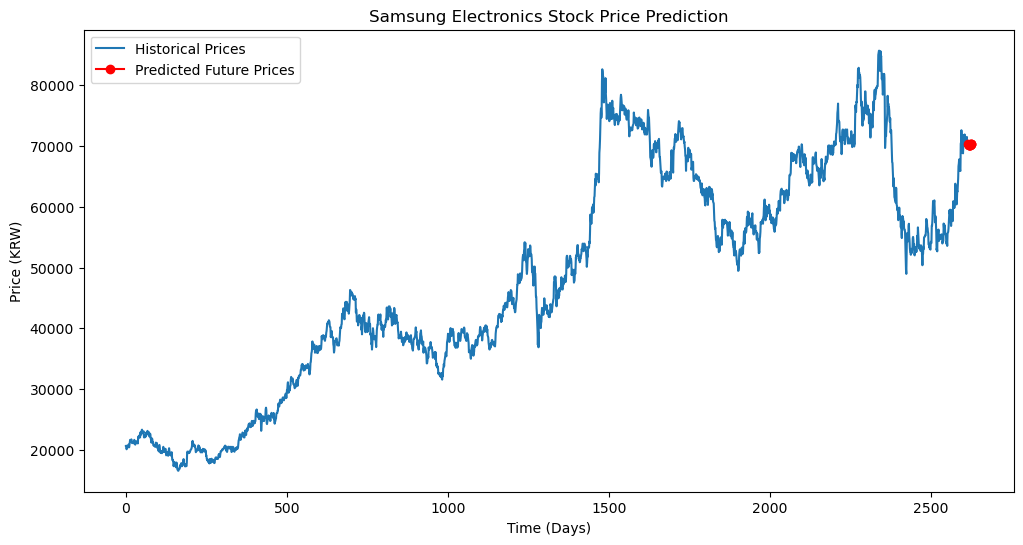

In [2]:
# Install required libraries
! pip install yfinance numpy pandas matplotlib scikit-learn tensorflow


import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -------------------------
# 1. Load Samsung Stock Data
# -------------------------
ticker = "005930.KQ"
data = yf.download(ticker, start="2015-01-01", end="2025-09-01")
close_prices = data['Close'].values.reshape(-1,1)

# -------------------------
# 2. Normalize Data
# -------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# -------------------------
# 3. Prepare sequences
# -------------------------
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)  # [samples, timesteps, features]

# -------------------------
# 4. Train LSTM Model
# -------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=20, batch_size=32)

# -------------------------
# 5. Predict Future Price
# -------------------------
def predict_future(data, model, days=5, seq_length=60):
    last_seq = data[-seq_length:]  # last sequence
    future_preds = []
    
    for _ in range(days):
        x_input = last_seq.reshape(1, seq_length, 1)
        pred = model.predict(x_input, verbose=0)
        future_preds.append(pred[0,0])
        last_seq = np.append(last_seq[1:], pred, axis=0)
    
    return scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

future_days = 10
future_prices = predict_future(scaled_data, model, days=future_days)
print(f"Predicted Samsung stock prices for next {future_days} days:\n", future_prices)

# -------------------------
# 6. Plot
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Historical Prices')
plt.plot(range(len(close_prices), len(close_prices)+future_days), future_prices, color='red', marker='o', label='Predicted Future Prices')
plt.title("Samsung Electronics Stock Price Prediction")
plt.xlabel("Time (Days)")
plt.ylabel("Price (KRW)")
plt.legend()
plt.show()
